<a href="https://colab.research.google.com/github/Zerzavot/GlobalAIHubDLCourse/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [9]:
a=raw_data[:,:-1]
a

array([[-1.1008778 , -3.9968398 , -4.2858426 , ...,  0.77381971,
         1.1196209 , -1.4362499 ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.32109663,
         0.90422673, -0.42179659],
       [ 0.49047253, -1.9144071 , -3.6163638 , ...,  1.0867984 ,
         1.403011  , -0.38356426],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.874136  ,
        -2.0083694 , -1.8083338 ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.261335  ,
         1.1504486 ,  0.80493225],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -2.2600228 ,
        -1.577823  , -0.68453092]])

In [3]:
X = raw_data[:,:-1]
y = raw_data[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                    random_state = 42)

X_train_normal =  X_train[y_train == 1]
X_test_normal = X_test[y_test == 1]

X_train_anomaly =  X_train[y_train == 0]
X_test_anomaly = X_test[y_test == 0]

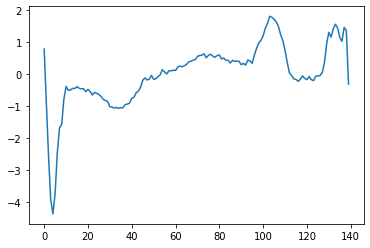

In [ ]:
plt.plot(X_train_normal[0])

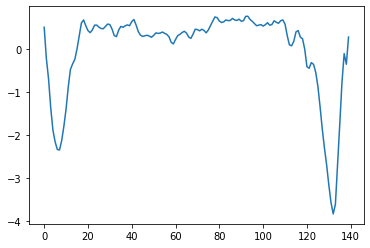

In [ ]:
plt.plot(X_train_anomaly[0])

In [ ]:
X_train.shape

(3998, 140)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train_normal)


PCA(n_components=10)

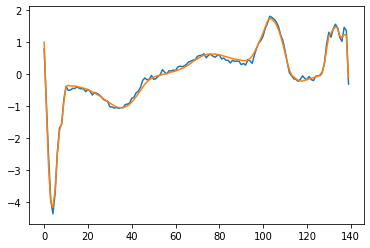

In [ ]:
X_train_normal_pred = pca.inverse_transform(pca.transform(X_train_normal))

plt.plot(X_train_normal[0])
plt.plot(X_train_normal_pred[0])

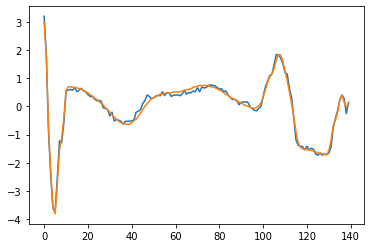

In [ ]:
X_test_normal_pred = pca.inverse_transform(pca.transform(X_test_normal))

plt.plot(X_test_normal[0])
plt.plot(X_test_normal_pred[0])

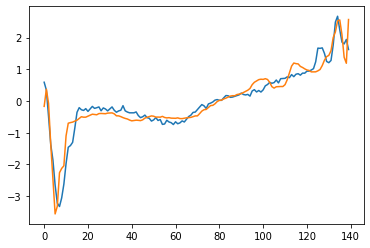

In [ ]:
X_test_anomaly_pred = pca.inverse_transform(pca.transform(X_test_anomaly))

plt.plot(X_test_anomaly[0])
plt.plot(X_test_anomaly_pred[0])

(array([1.785e+03, 4.290e+02, 6.800e+01, 2.000e+01, 1.300e+01, 6.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 3.000e+00]),
 array([ 5.18330633, 13.46716422, 21.7510221 , 30.03487998, 38.31873786,
        46.60259575, 54.88645363, 63.17031151, 71.45416939, 79.73802728,
        88.02188516]),
 <a list of 10 Patch objects>)

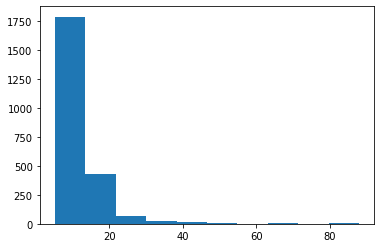

In [ ]:
X_train_normal_pred = pca.inverse_transform(pca.transform(X_train_normal))

mae_train = np.sum(np.abs(X_train_normal_pred - X_train_normal), axis = 1)

plt.hist(mae_train)

In [ ]:
thr = mae_train.mean() + mae_train.std()
thr

18.356390377830834

In [ ]:
X_test_pred = pca.inverse_transform(pca.transform(X_test))

mae_test = np.sum(np.abs(X_test_pred - X_test), axis = 1)

In [ ]:
ypred = np.zeros(mae_test.size)
ypred[mae_test < thr] = 1

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       409
         1.0       1.00      0.92      0.96       591

    accuracy                           0.95      1000
   macro avg       0.95      0.96      0.95      1000
weighted avg       0.96      0.95      0.95      1000

